In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

test = pd.read_csv('mnist_test.csv',header=None)
train = pd.read_csv('mnist_train.csv', header=None)

In [2]:
def preprocess(data):
    X = data.iloc[:, 1:]
    y = data.iloc[:, 0]
    digits = {j:[] for j in range(10)}
    for j in range(len(y)):
        cur_label = int(y[j])
        cur_pixel_data = np.array(X.iloc[j]).reshape(28,28)
        digits[cur_label].append(cur_pixel_data)
    digits = {j:np.stack(digits[j]) for j in range(10)}
    for j in range(10):
        print('shape of data with label', j, ':', digits[j].shape)
    
    return digits

In [3]:
print(test.shape)
test.head(5)

(10000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train.shape)
train.head(5)

(60000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_digits = preprocess(train)
test_digits = preprocess(test)

shape of data with label 0 : (5923, 28, 28)
shape of data with label 1 : (6742, 28, 28)
shape of data with label 2 : (5958, 28, 28)
shape of data with label 3 : (6131, 28, 28)
shape of data with label 4 : (5842, 28, 28)
shape of data with label 5 : (5421, 28, 28)
shape of data with label 6 : (5918, 28, 28)
shape of data with label 7 : (6265, 28, 28)
shape of data with label 8 : (5851, 28, 28)
shape of data with label 9 : (5949, 28, 28)
shape of data with label 0 : (980, 28, 28)
shape of data with label 1 : (1135, 28, 28)
shape of data with label 2 : (1032, 28, 28)
shape of data with label 3 : (1010, 28, 28)
shape of data with label 4 : (982, 28, 28)
shape of data with label 5 : (892, 28, 28)
shape of data with label 6 : (958, 28, 28)
shape of data with label 7 : (1028, 28, 28)
shape of data with label 8 : (974, 28, 28)
shape of data with label 9 : (1009, 28, 28)


In [6]:
train_four_data = train_digits[4]
train_nine_data = train_digits[9]

train_four_labels = np.ones(len(train_four_data))*-1
train_nine_labels = np.ones(len(train_nine_data))

train_four_data = np.reshape(train_four_data, (len(train_four_data), 28*28))
train_nine_data = np.reshape(train_nine_data, (len(train_nine_data), 28*28))

train_four_data = train_four_data[:500]
train_nine_data = train_nine_data[:500]

train_four_labels = train_four_labels[:500]
train_nine_labels = train_nine_labels[:500]

train_data = np.concatenate((train_four_data, train_nine_data))
train_labels = np.concatenate((train_four_labels, train_nine_labels))

train_four_data = train_four_data[:500]
train_nine_data = train_nine_data[:500]

train_four_labels = train_four_labels[:500]
train_nine_labels = train_nine_labels[:500]

train_data = np.concatenate((train_four_data, train_nine_data))
train_labels = np.concatenate((train_four_labels, train_nine_labels))

train_data.shape, train_labels.shape

((1000, 784), (1000,))

In [21]:
test_four_data = test_digits[4]
test_nine_data = test_digits[9]

test_four_labels = np.ones(len(test_four_data))*-1
test_nine_labels = np.ones(len(test_nine_data))

test_four_data = np.reshape(test_four_data, (len(test_four_data), 28*28))
test_nine_data = np.reshape(test_nine_data, (len(test_nine_data), 28*28))

test_four_data = test_four_data[:500]
test_nine_data = test_nine_data[:500]

test_four_labels = test_four_labels[:500]
test_nine_labels = test_nine_labels[:500]

test_data = np.concatenate((test_four_data, test_nine_data))
test_labels = np.concatenate((test_four_labels, test_nine_labels))

test_data.shape, test_labels.shape

((1000, 784), (1000,))

# (3a) L infinity Norm Gradient Descent
(a) Implement and run L∞ gradient descent with step size µ = 10−8. Run your algorithm for at least 1000 iterations and initialize with w (0) = 0 (i.e. the zero vector). Recall: L∞ gradient descent uses steps

In [22]:
def logistic_loss(w, X, y):
    z = np.dot(X, w)
    log_loss = np.log(1 + np.exp(-y * z))
    log_loss = np.clip(log_loss, a_min=None, a_max=500)
    return np.mean(log_loss)

def logistic_loss_gradient(w, X, y):
    z = np.dot(X, w)
    sigmoid = 1 / (1 + np.exp(-z))
    gradient = np.dot(X.T, (sigmoid - (y==1))) / X.shape[0]
    return gradient

def l_infinity_gradient_descent(X, y, lr, total_epochs=1000):
    w = np.zeros(X.shape[1])
    losses = []
    for epoch in range(total_epochs):
        loss = logistic_loss(w, X, y)
        losses.append(loss)
        gradient = logistic_loss_gradient(w, X, y)
        l1_norm = np.sum(np.abs(gradient))
        w = w - lr * np.sign(gradient) * l1_norm
    return w, losses


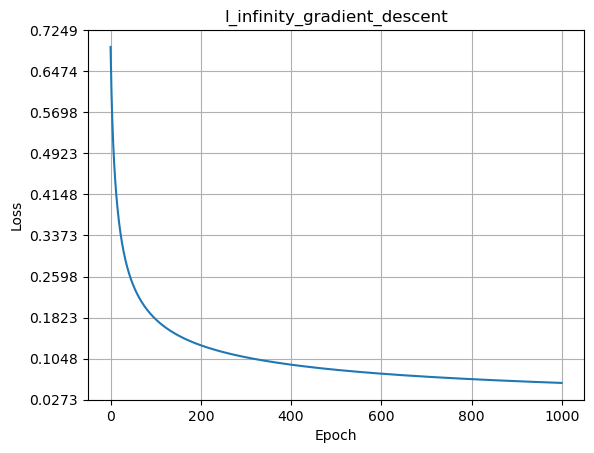

In [23]:
from matplotlib.ticker import LinearLocator

l_inf_w, l_inf_losses = l_infinity_gradient_descent(train_data, train_labels, lr=1e-8)

plt.plot(l_inf_losses)
plt.title('l_infinity_gradient_descent')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.gca().yaxis.set_major_locator(LinearLocator(numticks=10))

plt.grid()
plt.show()
plt.close()

# (3b) L1 Norm Gradient Descent
Implement and run L
1 gradient descent (aka. coordinate descent) with step
size µ = 10−4
. Run your algorithm for at least 1000 iterations and initialize
with w
(0) = 0 (i.e. the zero vector). Recall: L
1 gradient descent uses steps where j
∗
is the location of the largest entry of the gradient, and ej is the zero
vector with a 1 in the j
th entry.

In [11]:
def l_1_gradient_descent(X, y, total_epochs=1000, lr=1e-4):
    w = np.zeros(X.shape[1])
    losses = []
    for epoch in range(total_epochs):
        loss = logistic_loss(w, X, y)
        losses.append(loss)
        gradient = logistic_loss_gradient(w, X, y)
        j_s = np.argmax(np.abs(gradient))
        pt = np.sign(gradient[j_s]) * np.eye(X.shape[1])[j_s] * np.abs(gradient[j_s])
        w = w - lr * pt
    
    return w, losses

l_1_w, l_1_losses = l_1_gradient_descent(train_data, train_labels, lr=1e-4)

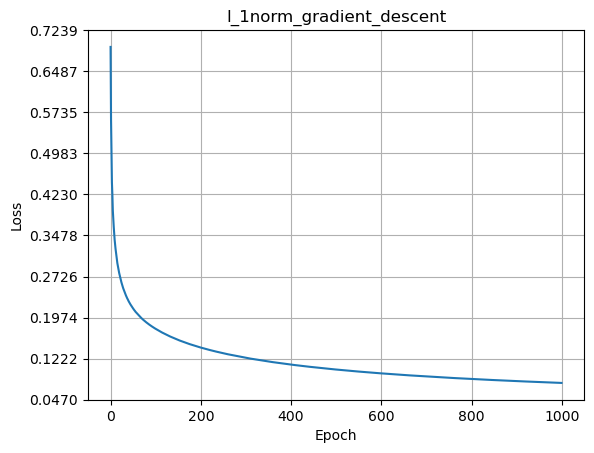

In [19]:
plt.plot(l_1_losses)
plt.title('l_1norm_gradient_descent')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.gca().yaxis.set_major_locator(LinearLocator(numticks=10))

plt.grid()
plt.show()
plt.close()

# (3c) 
Compare these two descent plots of F(w), along with the analogous plot
for gradient descent from HW3. Which performs best, and do you have an
argument for why? Do you think the performance would change with different
step sizes?

In [16]:
def gradient_descent(X, y, lr, total_epochs=1000, tol=1e-8):
    w = np.zeros(X.shape[1])
    losses = []
    for epoch in range(total_epochs):
        loss = logistic_loss(w, X, y)
        losses.append(loss)
        gradient = logistic_loss_gradient(w, X, y)
        w = w - lr * gradient

        if np.linalg.norm(gradient) < tol:
            break
    return w, losses

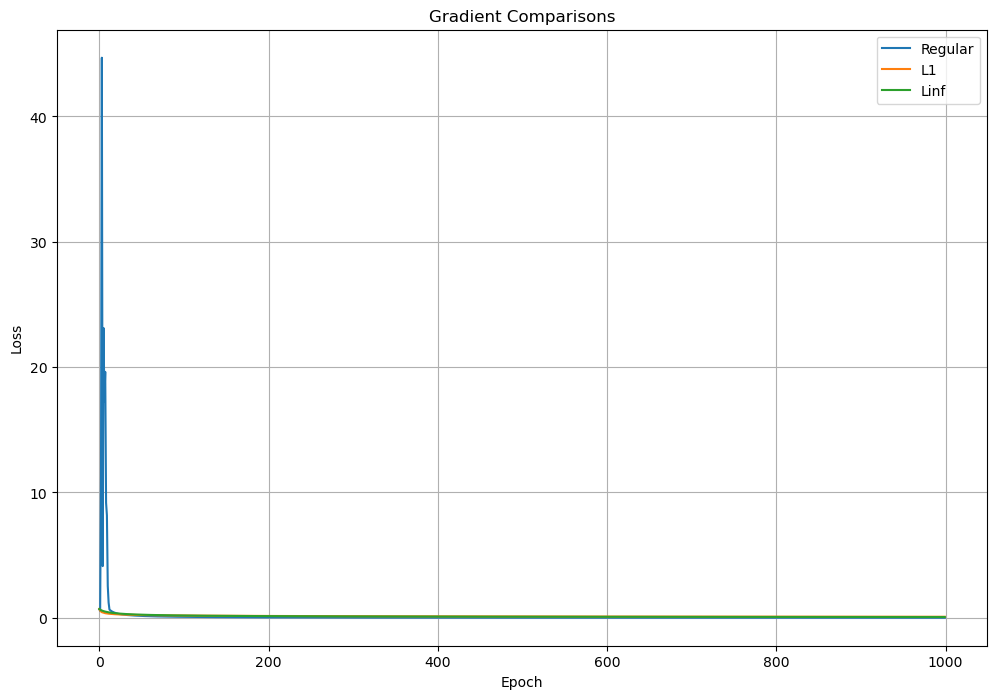

In [26]:
# regular gradient
w, regular_losses = gradient_descent(train_data, train_labels, lr=1e-4)

# infinity norm
l_inf_w, l_inf_losses = l_infinity_gradient_descent(train_data, train_labels, lr=1e-8)

# 1 norm
l_1_w, l_1_losses = l_1_gradient_descent(train_data, train_labels, lr=1e-4)

plt.figure(figsize=(12, 8))
plt.plot(regular_losses, label='Regular')
plt.plot(l_1_losses, label='L1')
plt.plot(l_inf_losses, label='Linf')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Gradient Comparisons')
plt.legend()
plt.grid()
plt.show()


### Ans:

In general, the three methods of gradient descent demonstrate similar performance, though L1 and Linf gradient descent exhibit smoother convergence compared to regular gradient descent, which shows fluctuations before converging. I believe this is because the Linf norm takes steps proportional to the sign of the gradient multiplied by the L1 norm of the gradient, leading to more aggressive steps and, consequently, faster convergence. The learning rate chosen for Linf descent is optimal, as I have tested it by using the same learning rate of 1e−4 that was applied to L1 and regular gradient descent, which caused overshooting issues. Similarly, L1 gradient descent updates only one coordinate at a time, which can be computationally efficient if the gradient is sparse. This method can be more stable in terms of updates since it scales with the Linf norm, but it might converge slowly if the important features are spread across many dimensions. Therefore, when choosing a learning rate of 1e−8, coordinate descent does not converge as smoothly. In summary, with the optimal step size, Linf descent achieves the fastest convergence, L1 descent is the most computationally efficient, and all three methods exhibit comparable performance.



/var/folders/90/9f8yk06x5m5cqysc4rrbrs_c0000gn/T/ipykernel_10752/486823421.py:3: RuntimeWarning: overflow encountered in exp
  log_loss = np.log(1 + np.exp(-y * z))
/var/folders/90/9f8yk06x5m5cqysc4rrbrs_c0000gn/T/ipykernel_10752/486823421.py:9: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-z))


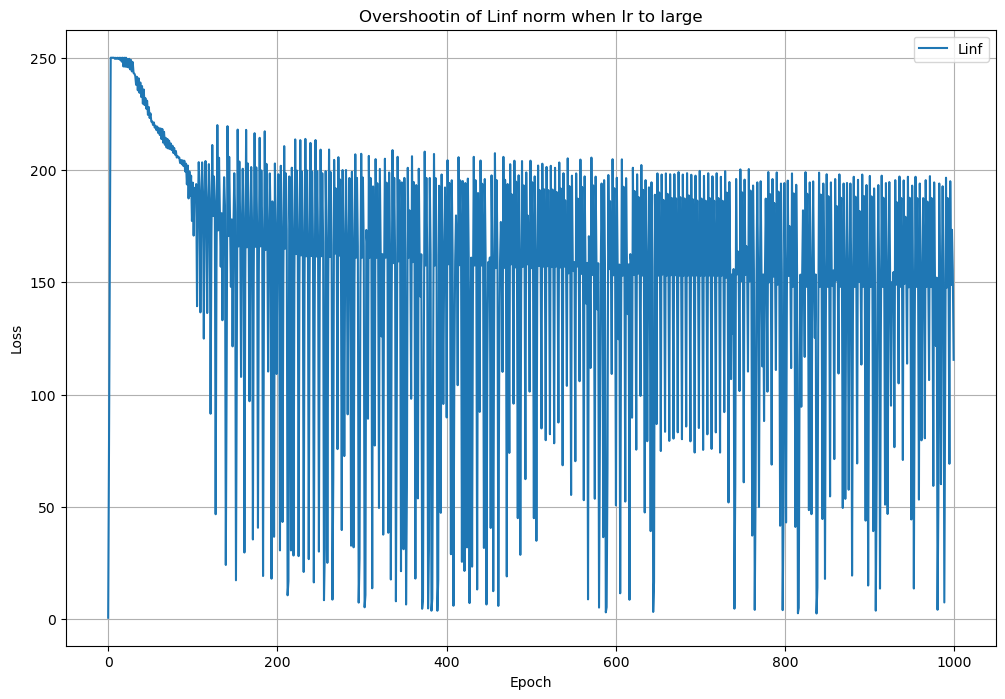

In [28]:
l_inf_w, l_inf_losses = l_infinity_gradient_descent(train_data, train_labels, lr=1e-4)
plt.figure(figsize=(12, 8))
plt.plot(l_inf_losses, label='Linf')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Overshootin of Linf norm when lr to large')
plt.legend()
plt.grid()
plt.show()


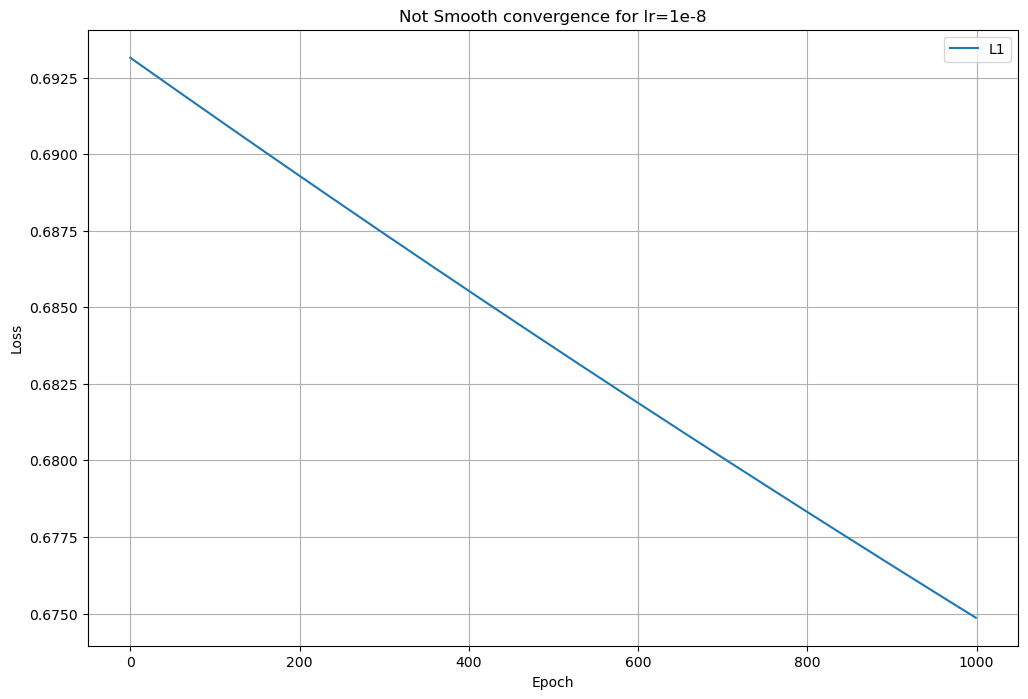

In [32]:
l_1_w, l_1_losses = l_1_gradient_descent(train_data, train_labels, lr=1e-8)
plt.figure(figsize=(12, 8))
plt.plot(l_1_losses, label='L1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Not Smooth convergence for lr=1e-8')
plt.legend()
plt.grid()
plt.show()

# (3d)
For the coordinate descent problem, rerun gradient descent but store a running sum of which entry of p
(t)
is nonzero at each iteration (not the actual
value of the direction vector, just ej
∗ ). This will result in a size 784 vector of
mostly zeros, and should have integers at various entries whose sum equals
the number of iterations. Reshape this vector to be a 28x28 image and display
the result. Why do you think these are the pixels that were chosen in the
gradient? How can you use this to interpret the algorithm and its results?

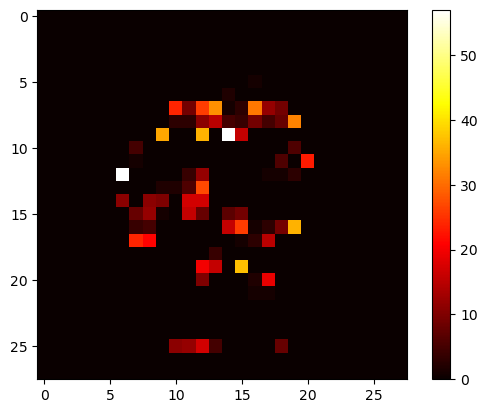

In [49]:
def l_1_gradient_descent_with_Update(X, y, total_epochs=1000, lr=1e-4):
    w = np.zeros(X.shape[1])
    losses = []
    update = np.zeros(X.shape[1])

    for epoch in range(total_epochs):
        loss = logistic_loss(w, X, y)
        losses.append(loss)
        gradient = logistic_loss_gradient(w, X, y)
        j_s = np.argmax(np.abs(gradient))
        update[j_s] += 1
        pt = np.sign(gradient[j_s]) * np.eye(X.shape[1])[j_s] * np.abs(gradient[j_s])
        w = w - lr * pt
    
    return w, losses, update

l_1_w, l_1_losses, update = l_1_gradient_descent_with_Update(train_data, train_labels, lr=1e-4)

plt.imshow(update.reshape(28, 28), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("")
plt.show()

### Ans:
I believe the pixels got chosen in the coordinate descent are the one that have the strongest classification power to distinguish between whether the image are 4 and 9. For example the (9,14) has the highest counts since most 4 from our datasets are likely to have a pixel value at that location while most 9 don't. Furthermore, by looking at the shape of the pixels in coordinate descent, it is similar to the shape 9 so that those updated locations are used to classify two digits. By analyzing these pixels, we can gain an understanding of which parts of the images are critical for the algorithm to recognize each digit, potentially revealing patterns that are distinctive of each class.